In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# https://archive.ics.uci.edu/ml/datasets/Power+consumption+of+Tetouan+city#

In [2]:
#data = pd.read_csv("Tetuan_City_power_consumption.csv")
data = pd.read_csv("Tetuan_City_power_consumption.csv" ) # ,index_col='DateTime')  # Should I switche the index to Datetime?
data.columns = data.columns.str.replace(' ','_')
#data['DateTime'] = pd.to_datetime(data['DateTime'])
data

,DateTime,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind_Speed                 52416 non-null  float64
 4   general_diffuse_flows      52416 non-null  float64
 5   diffuse_flows              52416 non-null  float64
 6   Zone_1_Power_Consumption   52416 non-null  float64
 7   Zone_2__Power_Consumption  52416 non-null  float64
 8   Zone_3__Power_Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [4]:
data.DateTime = pd.to_datetime(data.DateTime)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind_Speed                 52416 non-null  float64       
 4   general_diffuse_flows      52416 non-null  float64       
 5   diffuse_flows              52416 non-null  float64       
 6   Zone_1_Power_Consumption   52416 non-null  float64       
 7   Zone_2__Power_Consumption  52416 non-null  float64       
 8   Zone_3__Power_Consumption  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [6]:
data.set_index('DateTime', inplace=True)

# Zone 1

In [7]:
data_zone1 = data[['Zone_1_Power_Consumption']]

In [8]:
# Changing frequency to daily
data_zone1 = data_zone1.resample('3H').sum()

In [9]:
data_zone1

,Zone_1_Power_Consumption
DateTime,
2017-01-01 00:00:00,455629.36708
2017-01-01 03:00:00,372565.06328
2017-01-01 06:00:00,358766.58228
2017-01-01 09:00:00,473273.92404
2017-01-01 12:00:00,540121.51900
...,...
2017-12-30 09:00:00,510381.74904
2017-12-30 12:00:00,544778.70722
2017-12-30 15:00:00,547784.03043


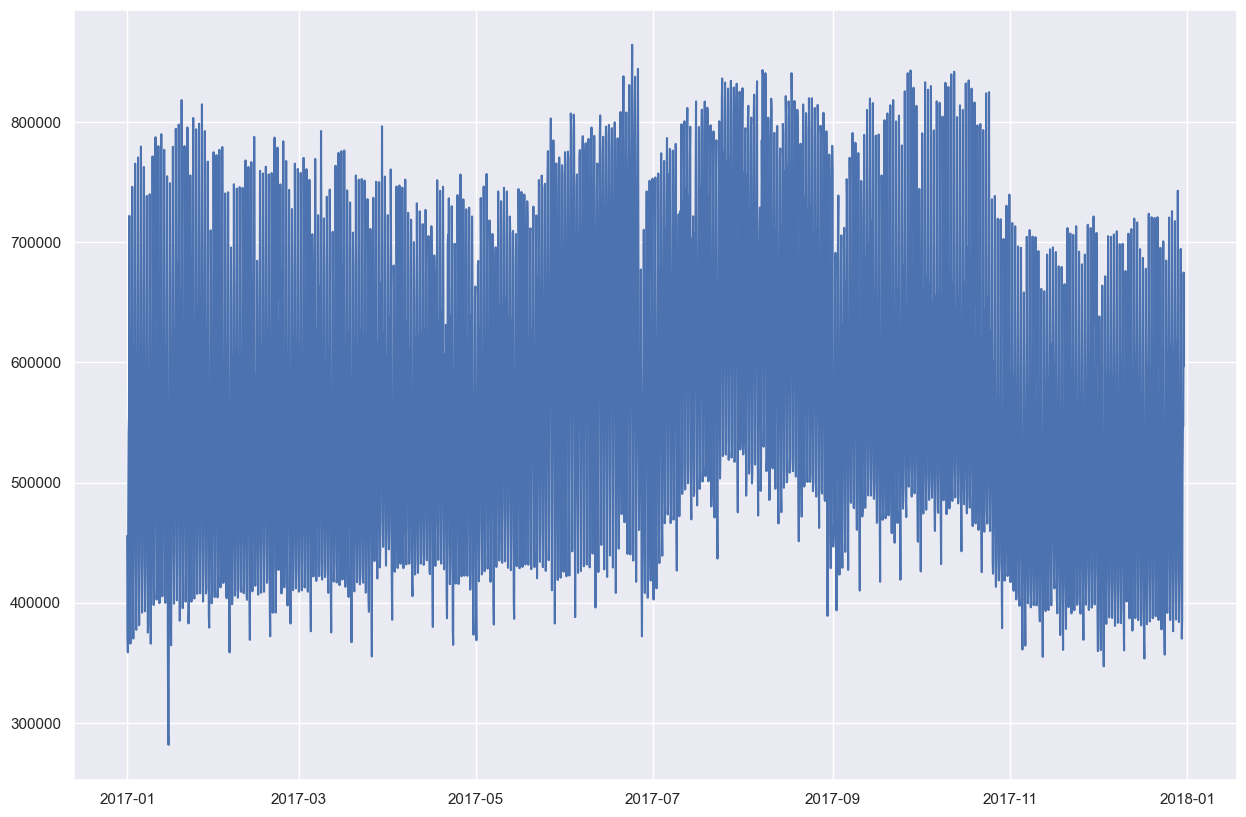

In [10]:
fig =plt.figure(figsize=(15,10))
plt.plot(data_zone1)

### Checking for seanality

In [11]:
# %pip install statsmodels

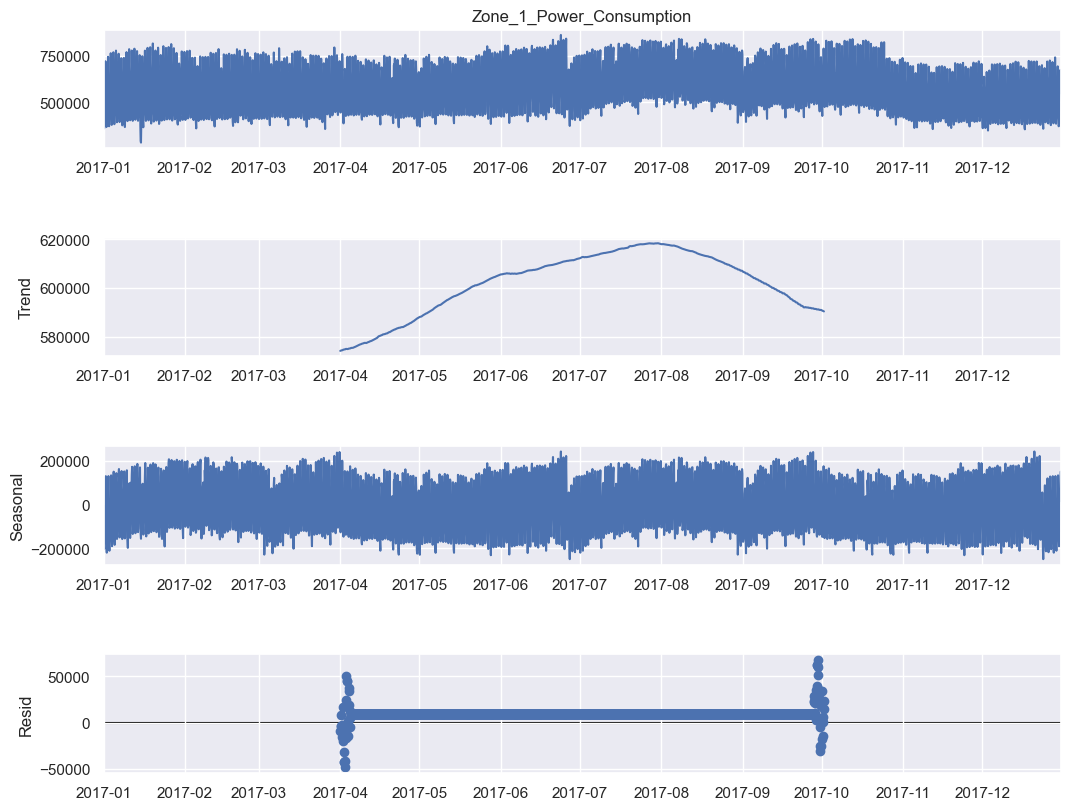

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Question about perioud and freq
#data_zone1.index.freq = 'YS'

# Specify multiplicative model  
fig = seasonal_decompose(data_zone1['Zone_1_Power_Consumption'],model='additive', period =24*60).plot();
fig.set_size_inches((12, 9))
plt.show()

![](assets/pd_offset_codes.png)

In [ ]:
type(data_zone1)

In [ ]:
data_zone1

In [13]:
# %pip install pmdarima

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from pmdarima import auto_arima 

def time_series_analysis( data, column, test_size, seasonal_status=False, seasonal_period=1 ):
    df_ = data[[column]]
    
    #Spliting data to train and test
    train_test_cutoff = int(len(df_)*(1-test_size))
    train = df_.iloc[:train_test_cutoff] # Drop the last 27 years of our data
    test = df_.iloc[train_test_cutoff:]
    
    # Finding best parameter
     
    best_fit = auto_arima(df_[[column]],trace=True ,
                          seasonal=seasonal_status, m=seasonal_period, error_action='ignore')
    
    # Fitting our ARIMA or SARIMA model 
    from statsmodels.tsa.arima.model import ARIMA
    
    
    if seasonal_status:  # It is deciding whether use Sarima or arima model based on "seasonal_status" input
        model = SARIMAX(train[column].astype(float), 
                        order=best_fit.order, 
                        seasonal_order=best_fit.seasonal_order).fit()
    else:
        model = ARIMA(train[column].astype(float), order=best_fit.order).fit() # best_fit.order is getting the order of the best fitted model from line above
    # Casting the training data as float is not a required step
    # This is to prevent us from getting a dtype error when predicting 

    # Predicting 

    # We want to start our predictions at the end of our training data 
    start = len(train)

    # We want to predict our entire DF - 1 because the end is inclusive. 
    # Our df has 264 rows, but rows start at 0 and end at row 263 
    end = len(train) + len(test) - 1

    predictions = model.predict(start=start, end=end, typ='levels').rename(f'best_fit{best_fit.order}')
    
    
    # Plotting our predictions 

    test[column].plot(figsize=(12,8), legend=True)
    predictions.plot(legend=True);
    plt.show()
    
    # Model Evaluation 
    from statsmodels.tools.eval_measures import rmse

    print(f'rmse: {rmse(test[column],predictions)}')
    # We can also compare the mean values for our predictions and mean values for the test set to see how we 
    # are doing

    print(f'Test Mean: {test[column].mean()}')
    print(f'Prediction Mean: {predictions.mean()}')
    
    if seasonal_status:  # It is deciding whether use Sarimax or arima model based on "seasonal_status" input

        full_data_model =SARIMAX(df_[column].astype(float), 
                                                    order=best_fit.order, 
                                                    seasonal_order=best_fit.seasonal_order).fit()
    else:
            
        full_data_model = ARIMA(df_[column].astype(float), order=best_fit.order,).fit()

    #model.summary()

    forecast = full_data_model.predict(start=len(df_), end=len(df_)+11, typ='levels').rename('ARIMA Forecast')

    df_[column].plot(legend=True,figsize=(12,6))
    forecast.plot(legend=True);
    

In [15]:
time_series_analysis( data_zone1, column='Zone_1_Power_Consumption', test_size=0.2, seasonal_status=True, seasonal_period=12 )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=69202.860, Time=8.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=75846.775, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=75537.510, Time=0.71 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=75436.238, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=75844.776, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=75445.133, Time=2.49 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=69773.147, Time=7.05 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=22.77 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=69182.278, Time=27.45 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=71925.394, Time=11.86 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=69079.386, Time=13.73 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=70300.564, Time=9.89 sec
 ARIMA(2,1,1)(2,0,2)[12] intercept   : AIC=72644.741, Time=9.54 sec
 ARIMA(3,1,2)(2,0,2)[12] intercept   : AIC=68735.440, Time=28.75 sec
 ARIMA

KeyboardInterrupt: 

# Step by Step approach

In [ ]:
df_ = data_zone1[['Zone_1_Power_Consumption']]

In [ ]:
#Spliting data to train and test
train_test_cutoff = int(len(df_)*(1-test_size))
train = df_.iloc[:train_test_cutoff] # Drop the last 27 years of our data
test = df_.iloc[train_test_cutoff:]